## 1. Importing Libraries

In [48]:
# jupyter nbconvert --to python Extract_Playlist_With_Duplicates.ipynb

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import csv
import pandas as pd
from datetime import datetime

import os
# from subprocess import Popen

from create_lib import create_lib
from get_uniques import get_uniques
# from duplicate_dates import duplicate_dates
from df_d import df_duplicates
from df_nd import df_no_duplicates
# from import_ratings import import_ratings

## 2. Import Data

Reading the Client ID and Client Secret from the .txt file to access my Spotify Developer App.

In [49]:
#Authentication - without user
with open(r"C:\Users\mackt\Python\Music Library\spotify_app_credentials.txt") as f:
    sac_lines = f.readlines()
    cid = sac_lines[0].split(", ")
    cid = cid[1].split("\n")
    cid = cid[0]
    # print(cid)
    secret = sac_lines[1].split(", ")
    secret = secret[1]
    # print(secret)

Passing the credentials through the Spotify API

In [50]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

Adding the Playlist link and URI.

In [51]:
# playlist_link = "https://open.spotify.com/playlist/5F5yHyXHt6vp2taA7DrEhJ?si=b4f82e9651444f28"
playlist_link = "https://open.spotify.com/playlist/7LaicnuGlBjUoHZ5Rd4tjm?si=e9f47ebd992b4d08"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

Spotify API only allows you to take 100 songs at a time. This allows you to continue to take 100 songs as many times as you can from the given playlist.

In [52]:
results = sp.playlist_tracks(playlist_URI)
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

In [53]:
for track in tracks:
    print(track["track"]["name"])
    genres_t = []
    for i in range (len(track["track"]["artists"])):
        genres = sp.artist(track["track"]["artists"][i]["id"])["genres"]
        genres_t = genres_t + genres
    print(genres_t)
    print("\n")
    # print(len(sp.artist(track["track"]["artists"])))
# print(sp.audio_analysis(track["track"]["id"]), '\n')
# print(sp.audio_features(track["track"]["uri"]), '\n')
# print(sp.track(track["track"]["uri"]), '\n')
# print(track["track"]["artists"][0]["id"], '\n')
# print(sp.artist(track["track"]["artists"][0]["id"])["genres"], '\n')

The Downfall of Us All
['metalcore', 'pop punk']


The Downfall Of Us All
['metalcore', 'pop punk']


Adam's Song
['pop punk', 'punk', 'rock', 'socal pop punk']


Adam's Song
['pop punk', 'punk', 'rock', 'socal pop punk']


Adam's Song
['pop punk', 'punk', 'rock', 'socal pop punk']


Alive
['dance pop', 'edm', 'electra', 'electro house', 'electropop', 'melodic dubstep', 'pop dance']


Alive
['alternative dance', 'australian dance', 'australian electropop', 'dance rock', 'electropop', 'indietronica', 'neo-synthpop']


Alive
['dance pop', 'edm', 'electra', 'electro house', 'electropop', 'melodic dubstep', 'pop dance']


Alive
['alternative dance', 'australian dance', 'australian electropop', 'dance rock', 'electropop', 'indietronica', 'neo-synthpop']


Alive
['dance pop', 'edm', 'electra', 'electro house', 'electropop', 'melodic dubstep', 'pop dance']


On The Floor
['dance pop', 'pop', 'pop rap', 'urban contemporary', 'dance pop', 'latin', 'miami hip hop', 'pop', 'pop rap']


$outh $ide

### lib - Create a dictionary of all the tracks and their parameters.

### duplicate_index - Create a list of labels, identifying duplicate songs (>0) and unique songs (-1).

In [54]:
lib, duplicate_index = create_lib(sp, tracks)

In [55]:
lib

{'track0': {'id': 0,
  'rating': '',
  'song': 'The Downfall of Us All',
  'song_fil': 'the downfall of us all',
  'artists_info': {'ar_name0': 'A Day To Remember',
   'ar_name0_fil': 'a day to remember',
   'ar_uri0': 'spotify:artist:4NiJW4q9ichVqL1aUsgGAN'},
  'artists': 'A Day To Remember',
  'artists_fil': 'a day to remember',
  'album': 'Homesick',
  'album_fil': 'homesick',
  'date': '',
  'local': 'Yes',
  'time': 209093,
  'popularity': 1,
  'danceability': 0.589,
  'energy': 0.881,
  'key': 0,
  'loudness': -4.62,
  'mode': 1,
  'speechiness': 0.0666,
  'acousticness': 0.000256,
  'instrumentalness': 0,
  'liveness': 0.327,
  'valence': 0.709,
  'tempo': 129.95,
  'uri': 'spotify:track:6G7URf5rGe6MvNoiTtNEP7',
  'duplicates': {'dup_id': 0, 'num_dup': 1, 'dup_loc0': 0, 'dup_loc1': 1},
  'uri0': 'spotify:track:6G7URf5rGe6MvNoiTtNEP7'},
 'track1': {'id': 1,
  'rating': '',
  'song': 'The Downfall Of Us All',
  'song_fil': 'the downfall of us all',
  'artists_info': {'ar_name0': '

In [56]:
duplicate_index

[0, 0, 2, 2, 2, 5, 6, 5, 6, 5, -1, -1, -1, -1, -1, -1, -1]

### uniques - List of the different labels in the duplicate_index.

### num_uniques - Number of songs per label.

In [57]:
uniques, num_uniques = get_uniques(duplicate_index)

duplicate_index
 [0, 0, 2, 2, 2, 5, 6, 5, 6, 5, -1, -1, -1, -1, -1, -1, -1]
uniques
 [-1, 0, 2, 5, 6]
Amount per uniques
 [7, 2, 3, 3, 2]


Dataframe with all duplicate songs present.

****Resulting df has some left over columns that were being used in other projects. This will be fixed later to help improve speed and efficiency.

In [58]:
# df_dup = df_duplicates(lib)
# df_dup['date'] = df_dup['date_spot']
# df_dup = df_dup.drop(['rating','date_spot','date_rsch','local'], 1)
# df_dup.to_csv('Playlist.csv', encoding='utf-8', index = False)
# df_dup.head()

In [59]:
# print(df.columns)

In [60]:
lib = df_no_duplicates(lib)
df = pd.DataFrame.from_dict(lib, orient='index')
df.columns

Index(['id', 'rating', 'song', 'song_fil', 'artists_info', 'artists',
       'artists_fil', 'album', 'album_fil', 'date', 'local', 'time',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri', 'duplicates', 'uri0', 'uri1', 'uri2'],
      dtype='object')

In [62]:
df = df.drop(['rating','local','song_fil','artists_fil','album_fil'], 1)
df.to_csv('Playlist.csv', encoding='utf-8', index = False)
df.head()

,id,song,artists_info,artists,album,date,time,popularity,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,uri,duplicates,uri0,uri1,uri2
track0,4,Adam's Song,"{'ar_name0': 'blink-182', 'ar_name0_fil': 'bli...",blink-182,Enema Of The State,,249627,71,0.520,0.775,...,0.034000,0.0,0.3640,0.382,136.028,spotify:track:6xpDh0dXrkVp0Po1qrHUd8,"{'dup_id': 2, 'num_dup': 2, 'dup_loc0': 2, 'du...",spotify:track:43NhiKnrtGqztxDqXrcUux,spotify:track:4RNeJ1qy9feTpgCI8xxQM1,spotify:track:6xpDh0dXrkVp0Po1qrHUd8
track1,1,The Downfall Of Us All,"{'ar_name0': 'A Day To Remember', 'ar_name0_fi...",A Day To Remember,Homesick,,209093,69,0.588,0.881,...,0.000252,0.0,0.3260,0.709,129.947,spotify:track:1KHKeIouP04dDtl0EetgED,"{'dup_id': 0, 'num_dup': 1, 'dup_loc0': 0, 'du...",spotify:track:6G7URf5rGe6MvNoiTtNEP7,spotify:track:1KHKeIouP04dDtl0EetgED,NaN
track2,16,Don't Stop the Party (feat. TJR),"{'ar_name0': 'Pitbull', 'ar_name0_fil': 'pitbu...","Pitbull, TJR",Global Warming: Meltdown (Deluxe Version),,206120,66,0.722,0.958,...,0.007260,0.0,0.3750,0.952,127.008,spotify:track:3Tu7uWBecS6GsLsL8UONKn,"{'dup_id': -1, 'num_dup': 0}",spotify:track:3Tu7uWBecS6GsLsL8UONKn,NaN,NaN
track3,15,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","{'ar_name0': 'A$AP Rocky', 'ar_name0_fil': 'a$...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...",LONG.LIVE.A$AP (Deluxe Version),,372173,64,0.489,0.878,...,0.351000,0.0,0.6980,0.775,81.497,spotify:track:1eLU27PPFxBhbp1CBjPh9J,"{'dup_id': -1, 'num_dup': 0}",spotify:track:1eLU27PPFxBhbp1CBjPh9J,NaN,NaN
track4,6,Alive,"{'ar_name0': 'Empire of the Sun', 'ar_name0_fi...",Empire of the Sun,Ice On The Dune,,204591,63,0.524,0.885,...,0.099700,0.0,0.0708,0.395,119.954,spotify:track:5WBnKCEsPwsvWHUZmLjS3s,"{'dup_id': 6, 'num_dup': 1, 'dup_loc0': 6, 'du...",spotify:track:5WBnKCEsPwsvWHUZmLjS3s,NaN,NaN


## 3. Pre-Processing Data

### Artists

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def plot_pie(x,y):
    # with plt.style.context('dark_background'):
    colors = cm.turbo(np.arange(len(x))/(len(x)))

    # plot
    fig, ax = plt.subplots()
    ax.axis(False)
    ax.pie(x,labels = y, autopct='%1.0f%%',radius=3, center=(4, 4),textprops={'color':"black"},colors=colors,
            wedgeprops={"linewidth": 1, "edgecolor": "black"}, frame=True)

    ax.set(xlim=(0, 1), xticks=np.arange(1, 8),
            ylim=(0, 1), yticks=np.arange(1, 8))

    plt.show()

In [64]:
print(df['artists_info'])

track0     {'ar_name0': 'blink-182', 'ar_name0_fil': 'bli...
track1     {'ar_name0': 'A Day To Remember', 'ar_name0_fi...
track2     {'ar_name0': 'Pitbull', 'ar_name0_fil': 'pitbu...
track3     {'ar_name0': 'A$AP Rocky', 'ar_name0_fil': 'a$...
track4     {'ar_name0': 'Empire of the Sun', 'ar_name0_fi...
track5     {'ar_name0': 'Jennifer Lopez', 'ar_name0_fil':...
track6     {'ar_name0': 'JV.JARVIS', 'ar_name0_fil': 'jv....
track7     {'ar_name0': 'Krewella', 'ar_name0_fil': 'krew...
track8     {'ar_name0': 'M&A', 'ar_name0_fil': 'm&a', 'ar...
track9     {'ar_name0': '$uicideboy$', 'ar_name0_fil': '$...
track10    {'ar_name0': 'Metro Boomin', 'ar_name0_fil': '...
Name: artists_info, dtype: object


In [65]:
df_artists = df.copy()

for index, row in df.iterrows():
    i = 0
    try:
        while row['artists_info']['ar_name{0}'.format(i)]:
            print(row['artists_info']['ar_name{0}'.format(i)])
            df_artists.at[index, row['artists_info']['ar_name{0}'.format(i)]] = 1
            i += 1
    except KeyError:
        pass
df_artists = df_artists.fillna(0)
df_artists = df_artists.drop(['artists_info'], 1)
df_artists.to_csv('Playlist_artists.csv', encoding='utf-8', index = False)
df_artists

blink-182
A Day To Remember
Pitbull
TJR
A$AP Rocky
Kendrick Lamar
Joey Bada$$
Yelawolf
Danny Brown
Action Bronson
Big K.R.I.T.
Empire of the Sun
Jennifer Lopez
Pitbull
JV.JARVIS
Krewella
M&A
Бэтси
$uicideboy$
Pouya
Metro Boomin
21 Savage


,id,song,artists,album,date,time,popularity,danceability,energy,key,...,Empire of the Sun,Jennifer Lopez,JV.JARVIS,Krewella,M&A,Бэтси,$uicideboy$,Pouya,Metro Boomin,21 Savage
track0,4,Adam's Song,blink-182,Enema Of The State,,249627,71,0.520,0.775,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track1,1,The Downfall Of Us All,A Day To Remember,Homesick,,209093,69,0.588,0.881,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track2,16,Don't Stop the Party (feat. TJR),"Pitbull, TJR",Global Warming: Meltdown (Deluxe Version),,206120,66,0.722,0.958,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track3,15,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...",LONG.LIVE.A$AP (Deluxe Version),,372173,64,0.489,0.878,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track4,6,Alive,Empire of the Sun,Ice On The Dune,,204591,63,0.524,0.885,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track5,10,On The Floor,"Jennifer Lopez, Pitbull",LOVE?,,284867,63,0.730,0.777,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track6,13,น้ำแดงน้ำส้ม,JV.JARVIS,น้ำแดงน้ำส้ม,,156373,62,0.845,0.631,9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track7,5,Alive,Krewella,Play Hard EP,,290760,55,0.663,0.822,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
track8,12,Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,"M&A, Бэтси",Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,,176542,36,0.942,0.566,11,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
track9,11,$outh $ide $uicide,"$uicideboy$, Pouya",High Tide In The Snake's Nest,,169320,0,0.797,0.516,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [68]:
def plot_bar(x,y,labels):
    import matplotlib.pyplot as plt
    import numpy as np

    colors = cm.turbo(np.arange(len(y))/(len(y)))

    # plot
    fig, ax = plt.subplots()

    ax.bar(x, y, labels = labels, width=1, edgecolor="white", colors = colors,linewidth=0.7)

    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
        ylim=(0, 8), yticks=np.arange(1, 8))

    plt.show()

There are 20 unique genres in the playlist.


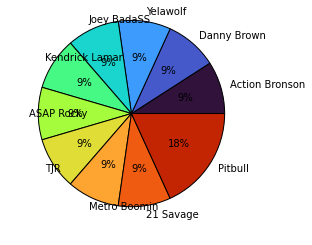

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[1 1 1 1 1 1 1 1 1 2]
[2.34184708 6.27008397 6.30096458 2.31986003 6.91518277 2.57639129
 6.8651196  4.24344794 5.59770433 6.14010845]


AttributeError: 'Rectangle' object has no property 'labels'

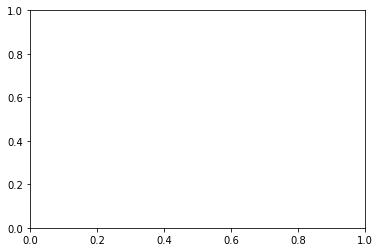

In [75]:
num_artists = df_artists.shape[1] - df.shape[1]
artists_cols = df_artists.iloc[:,-num_artists:]
artists_cols.value_counts()

artists_count = artists_cols.isin([1]).sum(axis=0)

ac = list(artists_count)
ac = np.array(ac).reshape((-1, 1))
l = np.array(artists_cols.columns).reshape((artists_cols.columns.size, 1))

ac = np.hstack((ac,l))
ac = ac[ac[:, 0].argsort()]

# other_count = np.sum(ac[:-10, :1])
# other = np.array([other_count,'Other']).reshape((1, -1))

# a = np.vstack((ac[-10:,:],other))
a = ac[-10:,:]

x = a[:, :1]
x = np.ndarray.tolist(x.reshape(1,-1)[0])
y = a[:, 1:]
y = np.ndarray.tolist(y.reshape(1,-1)[0])
import re
y = [re.sub('\$', 'S', item) for item in y]

print("There are {0} unique genres in the playlist.".format(num_artists))
plot_pie(x,y)
print(x)
y = np.array(x)
x = 0.5 + np.arange(len(x))
labels = y
z = np.random.uniform(2, 7, len(x))
print(y)
print(z)
plot_bar(x,y,labels)

### Genres

In [ ]:
df_artistsgenres = df_artists.copy()

for index, row in df_artists.iterrows():
    for genre in row['genres']:
            df_artistsgenres.at[index, genre] = 1
df_artistsgenres = df_artistsgenres.fillna(0)
df_artistsgenres = df_artistsgenres.drop(['genres'], 1)
df_artistsgenres.to_csv('Playlist_artists.csv', encoding='utf-8', index = False)
df_artistsgenres

,id,song,artists,album,date,time,popularity,danceability,energy,key,...,edm,electra,electro house,melodic dubstep,pop dance,dark trap,new orleans rap,underground hip hop,southern hip hop,trap
track0,4,Adam's Song,blink-182,Enema Of The State,1999-06-01,249627,71,0.520,0.775,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track1,1,The Downfall Of Us All,A Day To Remember,Homesick,2009-02-03,209093,69,0.588,0.881,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track2,16,Don't Stop the Party (feat. TJR),"Pitbull, TJR",Global Warming: Meltdown (Deluxe Version),2012-01-01,206120,66,0.722,0.958,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track3,15,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...",LONG.LIVE.A$AP (Deluxe Version),2013-01-01,372173,64,0.489,0.878,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track4,6,Alive,Empire of the Sun,Ice On The Dune,2013-01-01,204591,63,0.524,0.885,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track5,10,On The Floor,"Jennifer Lopez, Pitbull",LOVE?,2011-01-01,284867,63,0.730,0.777,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track6,13,น้ำแดงน้ำส้ม,JV.JARVIS,น้ำแดงน้ำส้ม,2021-04-09,156373,62,0.845,0.631,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track7,5,Alive,Krewella,Play Hard EP,2012-06-18,290760,55,0.663,0.822,9,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
track8,12,Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,"M&A, Бэтси",Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,2021-07-07,176542,36,0.942,0.566,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track9,11,$outh $ide $uicide,"$uicideboy$, Pouya",High Tide In The Snake's Nest,2015-06-15,169320,0,0.797,0.516,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
num_genres = df_artistsgenres.shape[1] - df_artists.shape[1]
genres_cols = df_artistsgenres.iloc[:,-num_genres:]

In [ ]:
df_trackparams = df_artistsgenres.iloc[:,:df.shape[1]]
df_trackgenres = df_artistsgenres.iloc[:,-num_genres:]
df_genres = pd.concat([df_trackparams,df_trackgenres], axis = 1)
df_genres

,id,song,artists,album,date,time,popularity,danceability,energy,key,...,edm,electra,electro house,melodic dubstep,pop dance,dark trap,new orleans rap,underground hip hop,southern hip hop,trap
track0,4,Adam's Song,blink-182,Enema Of The State,1999-06-01,249627,71,0.520,0.775,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track1,1,The Downfall Of Us All,A Day To Remember,Homesick,2009-02-03,209093,69,0.588,0.881,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track2,16,Don't Stop the Party (feat. TJR),"Pitbull, TJR",Global Warming: Meltdown (Deluxe Version),2012-01-01,206120,66,0.722,0.958,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track3,15,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...","A$AP Rocky, Kendrick Lamar, Joey Bada$$, Yelaw...",LONG.LIVE.A$AP (Deluxe Version),2013-01-01,372173,64,0.489,0.878,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track4,6,Alive,Empire of the Sun,Ice On The Dune,2013-01-01,204591,63,0.524,0.885,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track5,10,On The Floor,"Jennifer Lopez, Pitbull",LOVE?,2011-01-01,284867,63,0.730,0.777,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track6,13,น้ำแดงน้ำส้ม,JV.JARVIS,น้ำแดงน้ำส้ม,2021-04-09,156373,62,0.845,0.631,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track7,5,Alive,Krewella,Play Hard EP,2012-06-18,290760,55,0.663,0.822,9,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
track8,12,Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,"M&A, Бэтси",Симпл димпл поп ит сквиш (Slowed + Reverb) [Re...,2021-07-07,176542,36,0.942,0.566,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track9,11,$outh $ide $uicide,"$uicideboy$, Pouya",High Tide In The Snake's Nest,2015-06-15,169320,0,0.797,0.516,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
genres_cols.value_counts()

punk  rock  socal pop punk  metalcore  dance pop  latin  miami hip hop  pop  pop rap  east coast hip hop  hip hop  rap  alternative dance  australian dance  australian electropop  dance rock  electropop  indietronica  neo-synthpop  urban contemporary  thai viral pop  edm  electra  electro house  melodic dubstep  pop dance  dark trap  new orleans rap  underground hip hop  southern hip hop  trap
0.0   0.0   0.0             0.0        0.0        0.0    0.0            0.0  0.0      0.0                 0.0      0.0  0.0                0.0               0.0                    0.0         0.0         0.0           0.0           0.0                 0.0             0.0  0.0      0.0            0.0              0.0        0.0        0.0              0.0                  0.0               0.0     1
                                                                                                                                                                                                         

In [ ]:
genres_count = genres_cols.isin([1]).sum(axis=0)
genres_count

punk                     1
rock                     1
socal pop punk           1
metalcore                1
dance pop                3
latin                    1
miami hip hop            1
pop                      2
pop rap                  2
east coast hip hop       1
hip hop                  2
rap                      2
alternative dance        1
australian dance         1
australian electropop    1
dance rock               1
electropop               2
indietronica             1
neo-synthpop             1
urban contemporary       1
thai viral pop           1
edm                      1
electra                  1
electro house            1
melodic dubstep          1
pop dance                1
dark trap                1
new orleans rap          1
underground hip hop      1
southern hip hop         1
trap                     1
dtype: int64

In [ ]:
gc = list(genres_count)
gc = np.array(gc).reshape((-1, 1))
# print(gc)
l = np.array(genres_cols.columns).reshape((genres_cols.columns.size, 1))
print(gc.shape)
print(l.shape)

gc = np.hstack((gc,l))
gc


(31, 1)
(31, 1)


array([[1, 'punk'],
       [1, 'rock'],
       [1, 'socal pop punk'],
       [1, 'metalcore'],
       [3, 'dance pop'],
       [1, 'latin'],
       [1, 'miami hip hop'],
       [2, 'pop'],
       [2, 'pop rap'],
       [1, 'east coast hip hop'],
       [2, 'hip hop'],
       [2, 'rap'],
       [1, 'alternative dance'],
       [1, 'australian dance'],
       [1, 'australian electropop'],
       [1, 'dance rock'],
       [2, 'electropop'],
       [1, 'indietronica'],
       [1, 'neo-synthpop'],
       [1, 'urban contemporary'],
       [1, 'thai viral pop'],
       [1, 'edm'],
       [1, 'electra'],
       [1, 'electro house'],
       [1, 'melodic dubstep'],
       [1, 'pop dance'],
       [1, 'dark trap'],
       [1, 'new orleans rap'],
       [1, 'underground hip hop'],
       [1, 'southern hip hop'],
       [1, 'trap']], dtype=object)

In [ ]:
gc = gc[gc[:, 0].argsort()]
print(gc)
print(gc.shape)

[[1 'punk']
 [1 'underground hip hop']
 [1 'new orleans rap']
 [1 'dark trap']
 [1 'pop dance']
 [1 'melodic dubstep']
 [1 'electro house']
 [1 'electra']
 [1 'edm']
 [1 'thai viral pop']
 [1 'urban contemporary']
 [1 'neo-synthpop']
 [1 'indietronica']
 [1 'southern hip hop']
 [1 'dance rock']
 [1 'australian dance']
 [1 'alternative dance']
 [1 'east coast hip hop']
 [1 'miami hip hop']
 [1 'latin']
 [1 'metalcore']
 [1 'socal pop punk']
 [1 'rock']
 [1 'australian electropop']
 [1 'trap']
 [2 'electropop']
 [2 'rap']
 [2 'hip hop']
 [2 'pop rap']
 [2 'pop']
 [3 'dance pop']]
(31, 2)


In [ ]:
other_count = np.sum(gc[:-10, :1])
other = np.array([other_count,'Other']).reshape((1, -1))
print(np.sum(gc[:-10, :1]))
print(gc[:-10, :1].shape)
print(np.array([int(other_count),'Other']).reshape((1, -1)))

21
(21, 1)
[['21' 'Other']]


In [ ]:
gc[-10:,:]

array([[1, 'socal pop punk'],
       [1, 'rock'],
       [1, 'australian electropop'],
       [1, 'trap'],
       [2, 'electropop'],
       [2, 'rap'],
       [2, 'hip hop'],
       [2, 'pop rap'],
       [2, 'pop'],
       [3, 'dance pop']], dtype=object)

In [ ]:
a = np.vstack((gc[-10:,:],other))
a

array([[1, 'socal pop punk'],
       [1, 'rock'],
       [1, 'australian electropop'],
       [1, 'trap'],
       [2, 'electropop'],
       [2, 'rap'],
       [2, 'hip hop'],
       [2, 'pop rap'],
       [2, 'pop'],
       [3, 'dance pop'],
       ['21', 'Other']], dtype=object)

In [ ]:
x = a[:, :1]
x = np.ndarray.tolist(x.reshape(1,-1)[0])
y = a[:, 1:]
y = np.ndarray.tolist(y.reshape(1,-1)[0])


There are 31 unique genres in the playlist.


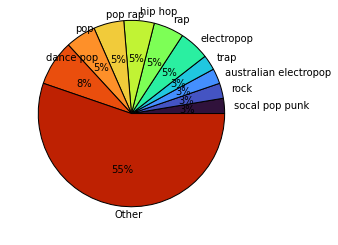

In [ ]:
print("There are {0} unique genres in the playlist.".format(num_genres))
plot_pie(x,y)